In [2]:
import pandas as pd
import numpy as np

Загружаем датасет

In [3]:
data_orig = pd.read_csv('Titanic.csv')
data_orig

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


До обработки размер датасета

In [4]:
data_orig.shape

(891, 12)

Удаляем все строки, содержащие пропущенные данные

In [5]:
data_proc = data_orig.dropna()

Посмотрим какие типы данных имеют признаки

In [6]:
data_proc.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Видим, что признаки Name, Sex, Ticket, Cabin и Embarked имеют не числовые значения. Удаляем все, кроме Sex и Embarked

In [7]:
data_proc = data_proc.drop(["Name", "Ticket","Cabin"], axis=1)

Выведем уникальные значения в оставшихся категориальных столбцах Sex и Embarked

In [8]:
print("Sex:", data_proc["Sex"].unique())
print("Embarked:", data_proc["Embarked"].unique())

Sex: ['female' 'male']
Embarked: ['C' 'S' 'Q']


Кодируем категориальные данные в столбцах Sex и Embarked

In [9]:
data_proc.loc[data_proc["Sex"] == "male", "Sex"] = 0
data_proc.loc[data_proc["Sex"] == "female", "Sex"] = 1
data_proc["Sex"] = pd.to_numeric(data_proc["Sex"])

In [10]:
data_proc.loc[data_proc["Embarked"] == "C", "Embarked"] = 1
data_proc.loc[data_proc["Embarked"] == "S", "Embarked"] = 2
data_proc.loc[data_proc["Embarked"] == "Q", "Embarked"] = 3
data_proc["Embarked"] = pd.to_numeric(data_proc["Embarked"])

Удалим столбец PassangerId

In [11]:
data_proc.drop(["PassengerId"], axis=1, inplace=True)

Посмотрим сколько данных у нас осталось после обработки

In [12]:
data_proc.shape

(183, 8)

In [13]:
print("Процент оставшихся данных:", data_proc.shape[0] * data_proc.shape[1] / data_orig.shape[0] / data_orig.shape[1] * 100, "%")

Процент оставшихся данных: 13.692480359147027 %


Таким образом мы потеряли примерно 86.3% данных

Далее отделим целевую переменную от данных и разобъем их на обучающую и тестовую выборки

In [14]:
X = data_proc.drop(["Survived"], axis=1)
y = data_proc["Survived"]

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

Будем обучать модели и оценивать их качество с помощью функции

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

def train_and_score(clf, model_name):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_probs = clf.predict_proba(X_test)
    print(model_name)
    print("Accurracy:", accuracy_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("F1: ", f1_score(y_test, y_pred))
    fig, axs = plt.subplots(1, 3, figsize=(16, 5))
    sns.heatmap(confusion_matrix(y_test, y_pred), ax=axs[0])
    axs[0].set_title("Тепловая карта матрицы ошибок")
    precision, recall, _ = precision_recall_curve(y_test, y_pred_probs[:,1])
    axs[1].plot(precision, recall)
    axs[1].set_xlabel("Precision")
    axs[1].set_ylabel("Recall")
    axs[1].set_title("Precision-recall кривая")
    TPR, FPR, _ = roc_curve(y_test, y_pred_probs[:,1])
    axs[2].plot(TPR, FPR)
    axs[2].set_xlabel("TPR")
    axs[2].set_ylabel("FPR")
    axs[2].set_title("ROC кривая")

Применим логистическую регрессию

Логистическая регрессия
Accurracy: 0.7272727272727273
Recall:  0.8648648648648649
Precision:  0.7619047619047619
F1:  0.810126582278481


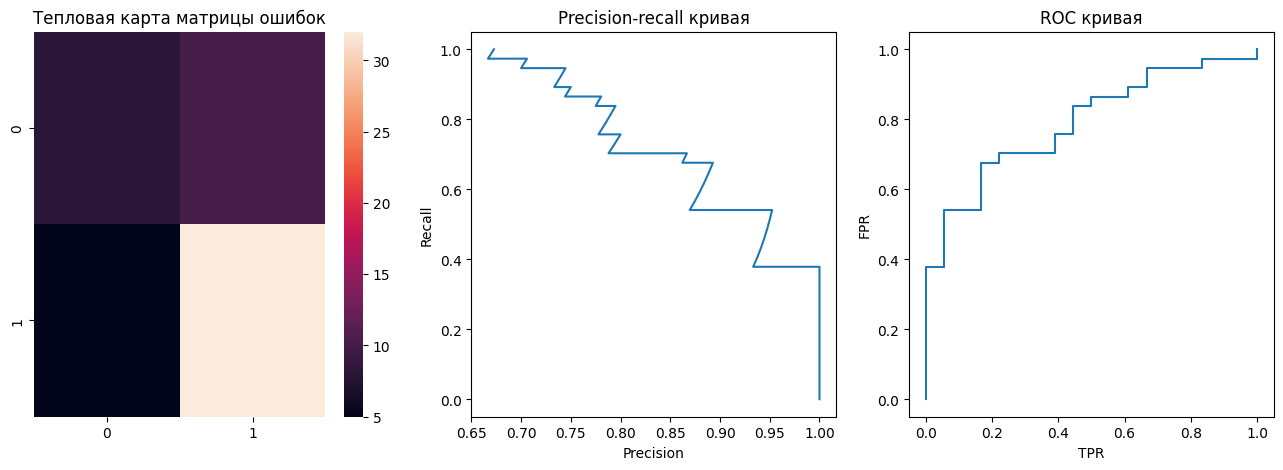

In [17]:
from sklearn.linear_model import LogisticRegression
train_and_score(LogisticRegression(max_iter=200), "Логистическая регрессия")

Модель угадывает лишь 72% процента ответов. При этом она склонна предсказывать 1, так как имеется большой recall и precision на порядок меньше, это подтверждается и на тепловой карте матрицы ошибок: в правом верхнем углу много значений. Но усредненный F1 получается неплохим. Precision-recall и ROC кривые нормальные. В целом модель хорошая

Теперь применим метод опорных векторов

Метод опорных векторов
Accurracy: 0.6727272727272727
Recall:  0.7567567567567568
Precision:  0.7567567567567568
F1:  0.7567567567567567


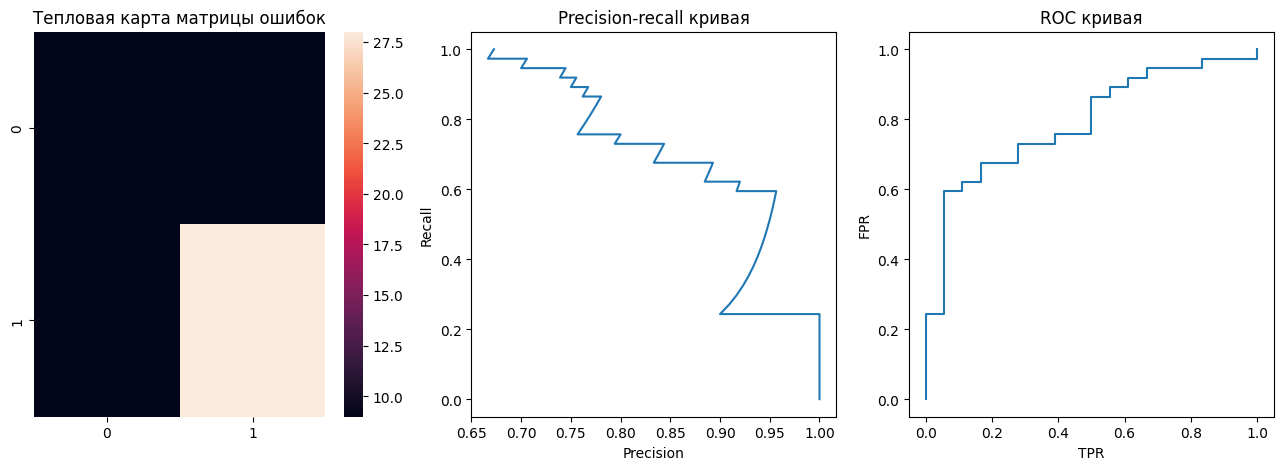

In [18]:
from sklearn.svm import SVC
train_and_score(SVC(kernel='linear', probability=True), "Метод опорных векторов")

В этом случае модель хорошо предсказывает 1, но с предсказанием 0 все плохо. Она либо считает его 1, либо 0 считает 1. Это видно как по матрицы ошибок, так и по precision и recall. Модель получилась хуже, чем логистическая регрессия.

И метод ближайших соседей

Метод ближайших соседей
Accurracy: 0.6727272727272727
Recall:  0.918918918918919
Precision:  0.6938775510204082
F1:  0.7906976744186046


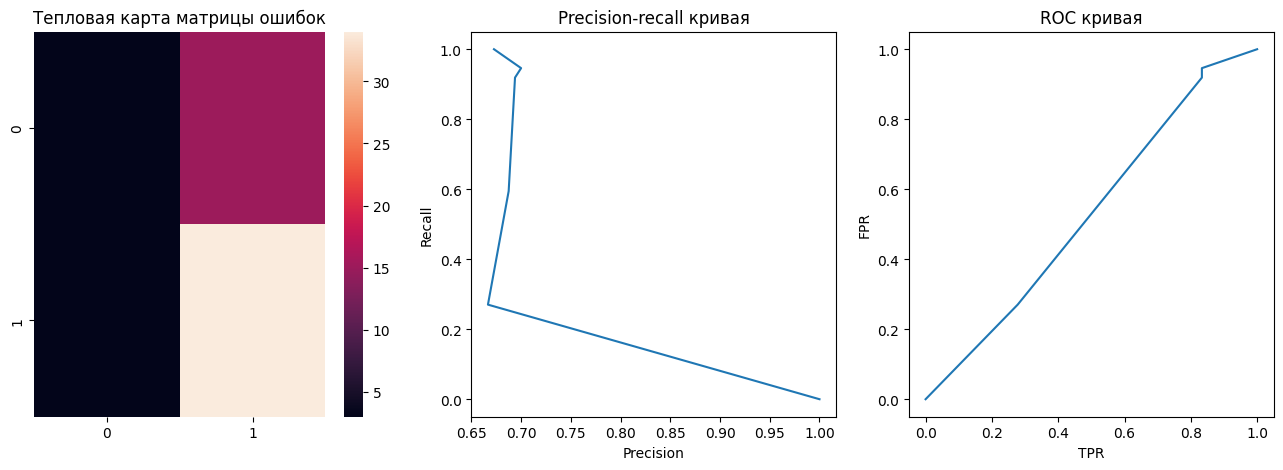

In [19]:
from sklearn.neighbors import KNeighborsClassifier
train_and_score(KNeighborsClassifier(), "Метод ближайших соседей")

Метод ближайших соседей вообще считает почти все наблюдения истинными: имеется очень большой Recall и маленький Precision. При этом модель совсем не умеет предсказывать вероятности: Precision-recall и ROC кривые получились очень плохими.

Лучшей моделью оказалась Логистическая регрессия. Она лучше всех умеет отделять истинные наблюдения от ложных